# פרוייקט גמר- ניתוח נתונים

## קבוצה מספר -25 ,"Affairs Data"- שם הדאטה


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

#### מגישות:

   #### מיקה מלמד,נועם שייר, שירה שלום ויעל רוט


קישור למקור ממנו לקחנו את הנתונים: "https://www.kaggle.com/datasets/utkarshx27/fairs-extramarital-affairs-data"

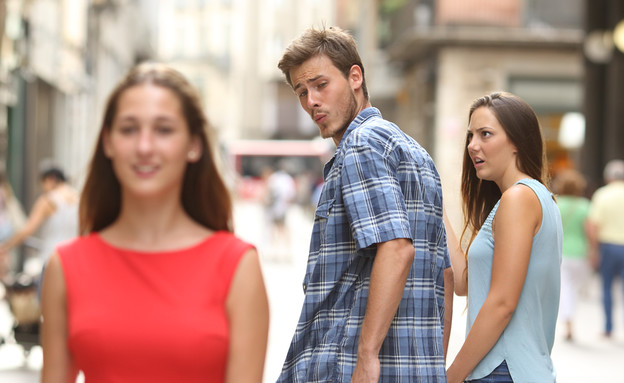

In [2]:
from IPython import display
display.Image('https://img.mako.co.il/2018/06/26/shutterstock_297886754_i.jpg')

### רקע על הדאטה

בעבודה זו נחקור את הגורמים אשר משפיעים על בני אדם לבגוד בבני זוגם באמצעות התכונות אשר מופיעות בדאטה

In [3]:
url = 'https://raw.githubusercontent.com/noamshayer/DataAnalistProject/main/Affairs.csv'
affairs_df = pd.read_csv(url)


In [4]:
del affairs_df[affairs_df.columns[0]]


In [5]:
affairs_df['index'] = range(0, len(affairs_df))
new_affairs=affairs_df.copy(deep=True)


In [6]:
new_affairs['age']=new_affairs['age'].astype(str)
new_affairs['yearsmarried']=new_affairs['yearsmarried'].astype(str)
new_affairs['affairs']=new_affairs['affairs'].astype(str)
new_affairs['education']=new_affairs['education'].astype(str)
new_affairs['rating']=new_affairs['rating'].astype(str)
new_affairs['occupation']=new_affairs['occupation'].astype(str)
new_affairs['religiousness']=new_affairs['religiousness'].astype(str)


In [7]:
new_affairs['age']=new_affairs['age'].replace({"37.0":"35-39","17.5":"Under 20","22.0":"20-24","27.0":"25-29","32.0":"30-34","42.0":"40-44","47.0":"45-49","52.0":"50-54","57.0":"55+"})
new_affairs['affairs']=new_affairs['affairs'].replace({"0":"none","1":"once","2":"twice","3":"3 times","7":"4-10 times","12":"monthly, weekly or daily"})
new_affairs['yearsmarried']=new_affairs['yearsmarried'].replace({"0.125":"3 months or less","0.417":"4-6 months","0.75":"6 months-1 year","1.5":"1-2 years","4.0":"3-5 years","7.0":"6-8 years","10.0":"9-11 years","15.0":"12+ years"})
new_affairs['religiousness']=new_affairs['religiousness'].replace({"1":"anti","2":"not at all","3":"slightly","4":"somewhat","5":"very"})
new_affairs['education']=new_affairs['education'].replace({"9":"grade school","12":"high school graduate","14":"some college","16":"college graduate","17":" some graduate work","18":"master's degree","20":"advanced degree"})
new_affairs['rating']=new_affairs['rating'].replace({"1":"very unhappy","2":"somewhat unhappy","3":"average","4":"happier than average","5":"very happy"})
#new_affairs


יצרנו עותק לטבלה המקורית, עליה ביצענו שינויים כדי שנוכל להציג את הנתונים הכלליים של הדאטה בצורה ברורה ומפורטת

### בדיקת ערכים חסרים

In [8]:
new_affairs.isnull().sum().sort_values(ascending=False)

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
index            0
dtype: int64

 
 ניתן לראות כי אין ערכים חסרים, ולכן לא נבצע שינויים בדאטה.

### הצגת הדאטה בצורה ויזואלית  


In [9]:
features=["affairs","gender","age","yearsmarried","children","religiousness","education","occupation","rating"]

In [10]:
melt_affairs=new_affairs.melt(id_vars="index",value_vars=features)


In [11]:
new_affairs[['education']].value_counts()


education           
some college            154
college graduate        115
master's degree         112
 some graduate work      89
advanced degree          80
high school graduate     44
grade school              7
dtype: int64

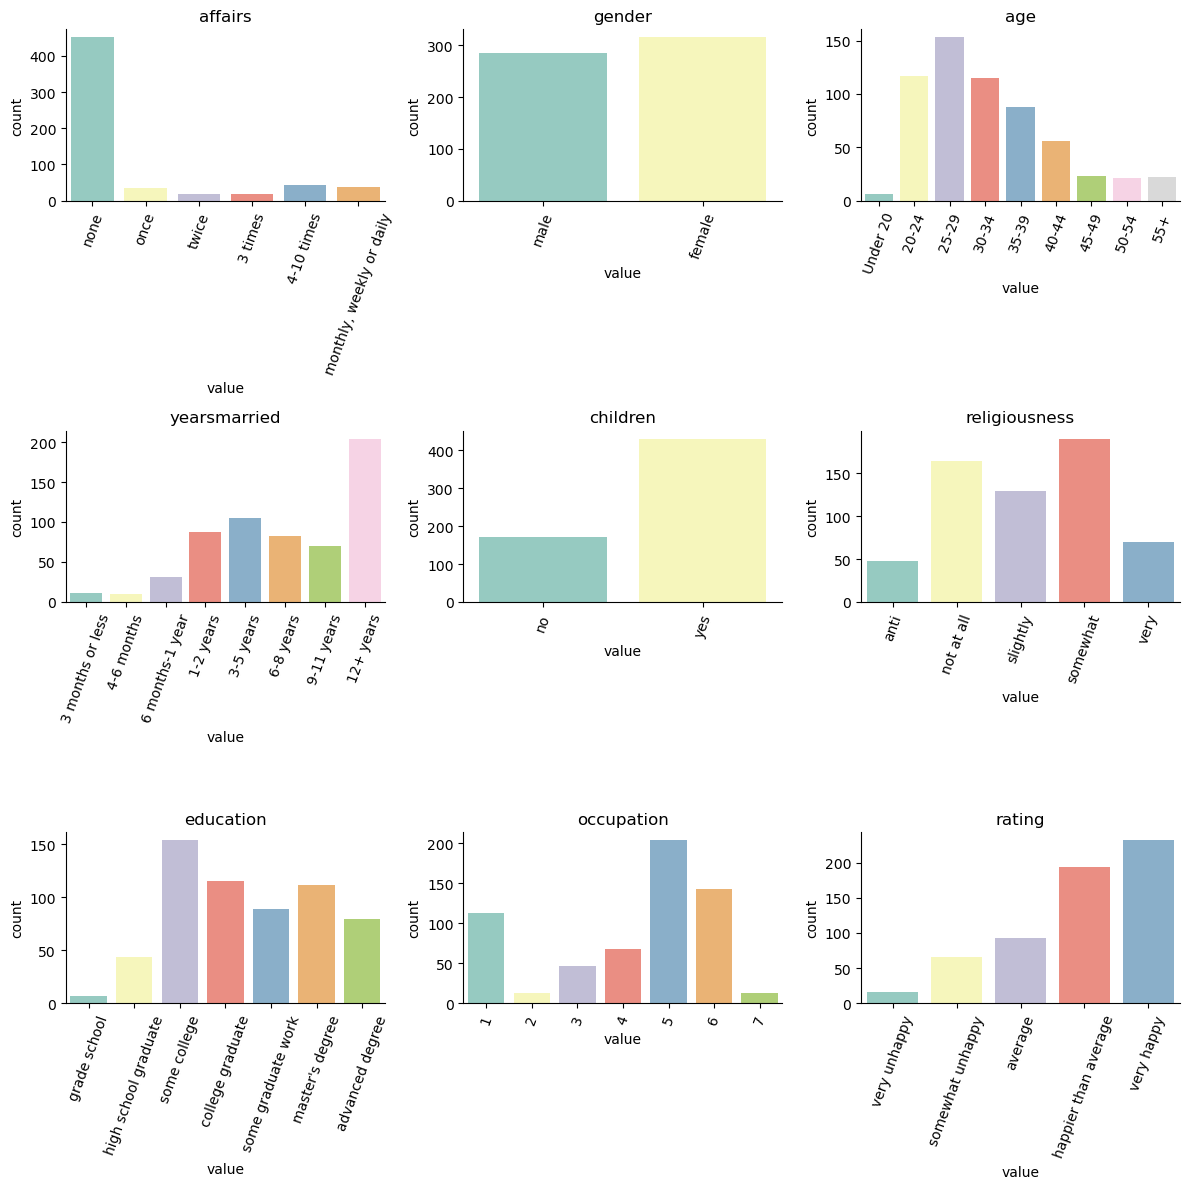

In [12]:
x_orders = {
    'affairs': ['none', 'once', 'twice', '3 times', '4-10 times', 'monthly, weekly or daily'],
    'gender': ['male', 'female'],
    'age': ['Under 20', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55+'],
    'yearsmarried': ['3 months or less', '4-6 months', '6 months-1 year', '1-2 years', '3-5 years', '6-8 years', '9-11 years', '12+ years'],
    'children': ['no', 'yes'],
    'religiousness': ['anti', 'not at all', 'slightly', 'somewhat', 'very'],
    'education': ['grade school', 'high school graduate', 'some college', 'college graduate', ' some graduate work', "master's degree", 'advanced degree'],
    'occupation': ['1', '2', '3', '4', '5', '6', '7'],
    'rating': ['very unhappy', 'somewhat unhappy', 'average', 'happier than average', 'very happy']
}
affairs_histplots = sns.FacetGrid(melt_affairs, col="variable", hue="variable", col_wrap=3, sharex=False, sharey=False, height=4)

for ax, variable in zip(affairs_histplots.axes.flat, affairs_histplots.col_names):
    if variable in x_orders:
        ordered_data = melt_affairs.loc[melt_affairs['variable'] == variable].sort_values('value')
        ordered_categories = ordered_data['value'].unique()

        sns.countplot(data=ordered_data, x='value', ax=ax, order=x_orders[variable], palette='Set3')
        ax.set_xticklabels(x_orders[variable], rotation=70)
        ax.set_title(variable)
plt.tight_layout()
plt.show()


### הצגת הקורולציה  


In [13]:
features=["affairs","gender","age","yearsmarried","children","religiousness","education","occupation","rating"]

In [14]:
affairs_dummies = pd.get_dummies(affairs_df[features])


In [15]:
correlation_matrix = affairs_dummies.corr().round(2)


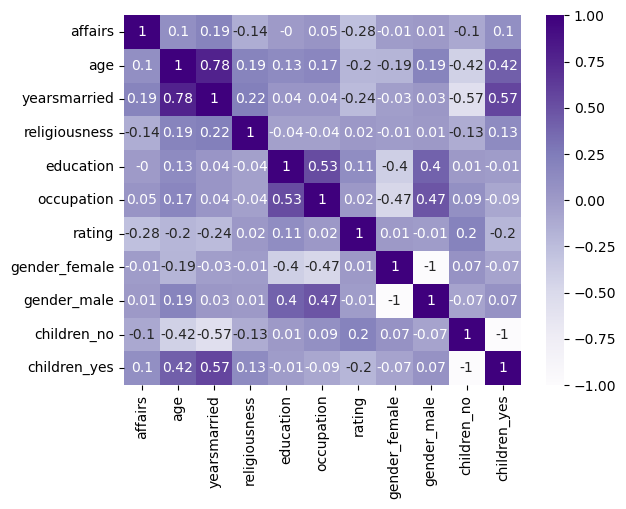

In [16]:
sns.heatmap(data=correlation_matrix,cmap='Purples', annot=True)
plt.show()


ניתן לראות כי לא מצאנו קורולציה משמעותית שתעזור לנו לבחון איזה קריטריון ישפיע על קיומו של רומן.

In [17]:
yes_no_affairs=affairs_df.copy(deep=True)


In [18]:
yes_no_affairs['gender']=yes_no_affairs['gender'].astype(str)
yes_no_affairs['age']=yes_no_affairs['age'].astype(str)
yes_no_affairs['yearsmarried']=yes_no_affairs['yearsmarried'].astype(str)
yes_no_affairs['affairs']=yes_no_affairs['affairs'].astype(str)
yes_no_affairs['education']=yes_no_affairs['education'].astype(str)
yes_no_affairs['rating']=yes_no_affairs['rating'].astype(str)
yes_no_affairs['occupation']=yes_no_affairs['occupation'].astype(str)
yes_no_affairs['religiousness']=yes_no_affairs['religiousness'].astype(str)


In [19]:
yes_no_affairs['gender']=yes_no_affairs['gender'].replace({'male':0,'female':1})
yes_no_affairs['children']=yes_no_affairs['children'].replace({'no':0,'yes':1})
yes_no_affairs['age']=yes_no_affairs['age'].replace({"37.0":"35-39","17.5":"Under 20","22.0":"20-24","27.0":"25-29","32.0":"30-34","42.0":"40-44","47.0":"45-49","52.0":"50-54","57.0":"55+"})
yes_no_affairs['affairs']=yes_no_affairs['affairs'].replace({"0":"no","1":"yes","2":"yes","3":"yes","7":"yes","12":"yes"})
yes_no_affairs['yearsmarried']=yes_no_affairs['yearsmarried'].replace({"0.125":"0.25"})
yes_no_affairs['education']=yes_no_affairs['education'].replace({"9":"grade school","12":"high school graduate","14":"some college","16":"college graduate","17":" some graduate work","18":"master's degree","20":"advanced degree"})


## "מסקנה 1- "מגדר

ראשית, נרצה לראות האם יש קשר בין המגדר של האדם ובין בחירתו לבגוד.

שאלנו את השאלה: האם גברים בוגדים יותר מנשים? ואולי נשים בוגדות יותר מגברים?

In [20]:
column_gender_general=new_affairs['gender'].value_counts()


In [21]:
new_affairs2=new_affairs.copy(deep=True)


In [22]:
new_affairs2['affairs']=new_affairs2['affairs'].replace({'none':'Did not cheat',"once":'cheat',"twice":'cheat',"3 times":'cheat',"4-10 times":'cheat',"monthly, weekly or daily":'cheat'})

In [23]:
column_women_affairs=new_affairs2[new_affairs2.gender=='female']['affairs'].value_counts()


In [24]:
column_men_affairs=new_affairs2[new_affairs2.gender!='female']['affairs'].value_counts()


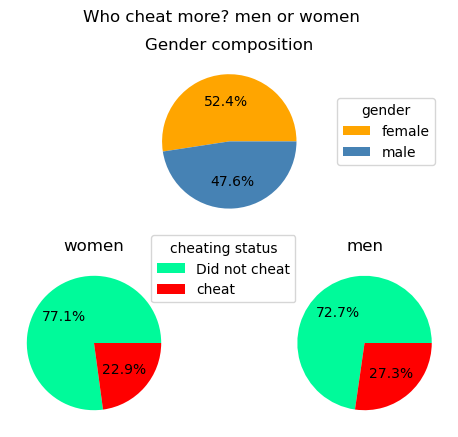

In [25]:
colors1= ['orange', 'steelblue']
colors2=['mediumspringgreen','red']
plt.subplot(2, 1, 1)
plt.pie(column_gender_general, colors=colors1 ,autopct='%1.1f%%')
plt.title('Gender composition')
plt.legend(column_gender_general.index, title="gender",bbox_to_anchor=(1.1, 0.8))

plt.subplot(2, 2, 3)
plt.pie(column_women_affairs,colors=colors2 ,autopct='%1.1f%%')
plt.title('women')
plt.legend(column_women_affairs.index, title="cheating status", bbox_to_anchor=(0.8, 0.7))

plt.subplot(2, 2, 4)
plt.pie(column_men_affairs,colors=colors2 ,autopct='%1.1f%%')
plt.title('men')

plt.suptitle("Who cheat more? men or women")
plt.show()

ניתן לראות באיור העליון פילוג באחוזים של עוני הסקר- יותר נשים ענו מגברים.

כעת נתמקד באיורים התחתונים, האיורים הללו מפרטים לנו את אחוזי הבגידות עבור כל מגדר 

ואכן ניתן לראות כי קבוצת הגברים בגדו יותר מקבוצת הנשים אך ההפרש זניח ולא משמעותי

## "מסקנה 2- "רמת אושר

שנית, נרצה לבדוק כיצד דירוג האושר ישפיע על סוגי הרומנים שאדם יבצע.

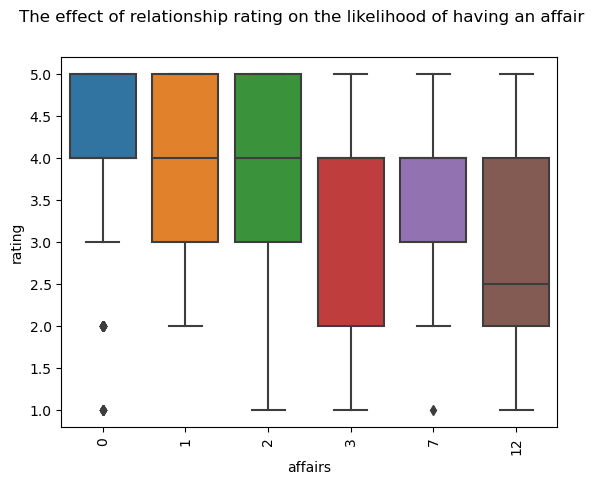

In [63]:
sns.boxplot(data = affairs_df, x = 'affairs', y = 'rating').tick_params(axis='x',rotation=90)
plt.suptitle("The effect of relationship rating on the likelihood of having an affair")
plt.show()

באמצעות הבוקספלוט ניתן לראות כי כאשר אדם מנהל 0 רומנים, דירוג האושר שלו יהיה גבוה.

לעומת זאת, ככל שאדם יקיים רומן ויעלה את תדירות הרומנים שהוא ינהל, מידת האושר שלו תלך ותרד.

## "מסקנה 3- "ילדים

במסקנה כעת, נבדוק את הקשר בין הילדים לסיכוי לנהל רומן

## Is there a connection between children and having an affair? 

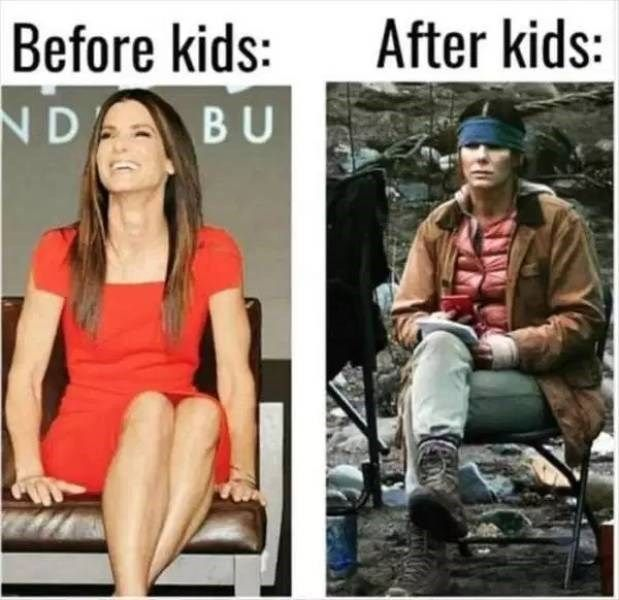

In [26]:
display.Image('https://i.pinimg.com/736x/ca/b8/6f/cab86fd10c9488c52f497987dfabaf78.jpg')


In [27]:
new_affairs2['rating']=new_affairs2['rating'].replace({"very unhappy":1,"somewhat unhappy":2,"average":3,"happier than average":4,"very happy":5})
no_affairs=new_affairs2.loc[new_affairs2.affairs=="Did not cheat"]
only_affairs=new_affairs2.loc[new_affairs2.affairs!="Did not cheat"]


In [28]:
no_affairs_no_child=no_affairs.loc[no_affairs.children=='no']
no_affairs_yes_child=no_affairs.loc[no_affairs.children!='no']
only_affairs_no_child=only_affairs.loc[only_affairs.children=='no']
only_affairs_yes_child=only_affairs.loc[only_affairs.children!='no']


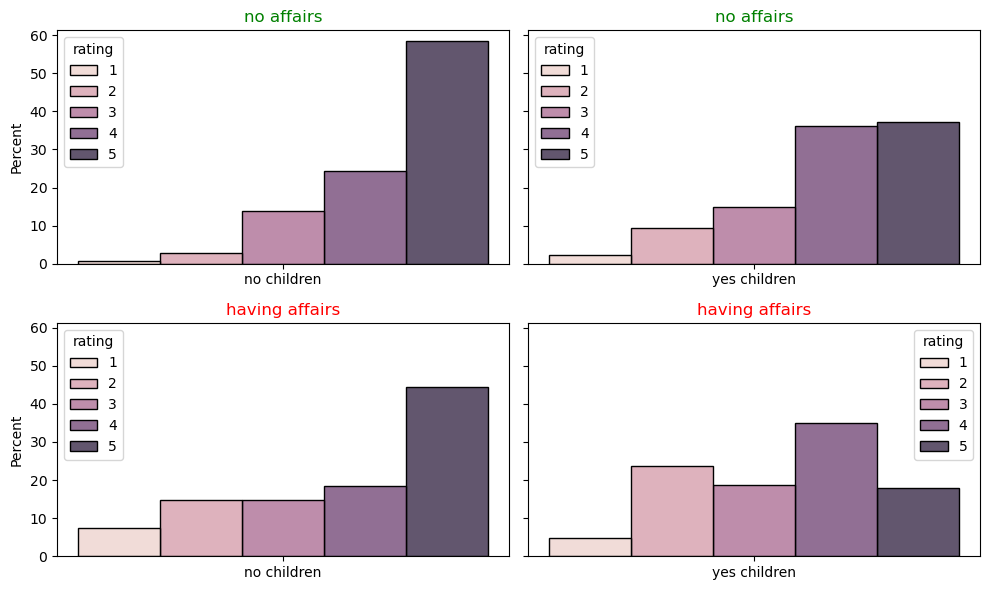

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(10, 6), sharey=True)
plt.subplots_adjust(wspace=0.9, hspace=1)

sns.histplot(data=no_affairs_no_child, x="children", hue="rating", multiple="dodge", ax=ax[0, 0], stat='percent').tick_params(axis="x")
ax[0, 0].set_title("no affairs", color='green')
ax[0, 0].set_xticks([0])
ax[0, 0].set_xticklabels(['no children'])
ax[0, 0].set_xlabel('')

sns.histplot(data=no_affairs_yes_child, x="children", hue="rating", multiple="dodge", ax=ax[0, 1], stat='percent').tick_params(axis="x")
ax[0, 1].set_title("no affairs", color='green')
ax[0, 1].set_xticks([0])
ax[0, 1].set_xticklabels(['yes children'])
ax[0, 1].set_xlabel('')

sns.histplot(data=only_affairs_no_child, x="children", hue="rating", multiple="dodge", ax=ax[1, 0], stat='percent').tick_params(axis="x")
ax[1, 0].set_title("having affairs", color='red')
ax[1, 0].set_xticks([0])
ax[1, 0].set_xticklabels(['no children'])
ax[1, 0].set_xlabel('')

sns.histplot(data=only_affairs_yes_child, x="children", hue="rating", multiple="dodge", ax=ax[1, 1], stat='percent').tick_params(axis="x")
ax[1, 1].set_title("having affairs", color='red')
ax[1, 1].set_xticks([0])
ax[1, 1].set_xticklabels(['yes children'])
ax[1, 1].set_xlabel('')

plt.tight_layout()
plt.show()


חילקנו את הדאטה ל2 קבוצות חברתיות הנבדלות ב- בוגדים או לא בוגדים.
קבוצת הביקורת -אנשים שלא בגדו
קבוצת הניסוי- אנשים שבגדו.
רצינו לבדוק האם קיים קשר בין קיום ילדים לבין רמת האושר וקיום בגידה.
חילקנו כל קבוצה לאלו שיש ילדים ואלו שאין להם.
מסקנה:
ניתן לראות מהגרפים של קבוצת הביקורת (אנשים שלא בגדו) שרמת האושר בחייהם לא מושפעת מנוכחות ילדים (אם נחבר את האחוזים של עמודות 4 ו5, 80% מהאנשים מ2 הקבוצות בעלי רמת אושר זהה וגבוהה)
ואילו מקבוצת הניסוי אנו רואים כשיש ילדים הם פחות מאושרים מאלו שלא בגדו ובעלי ילדים גם.
לכן, אין השפעה גדולה של נוכחות ילדים על מידת האושר של האדם והחלטתו לבגוד 

## "מסקנה 4- "שנות נישואים


במסקנה  זו נרצה לבדוק את ההשפעה של משך שנות הנישואים של אדם על הסבירות לקיים רומן

## Is there a connection between having an affair and years of marrige?

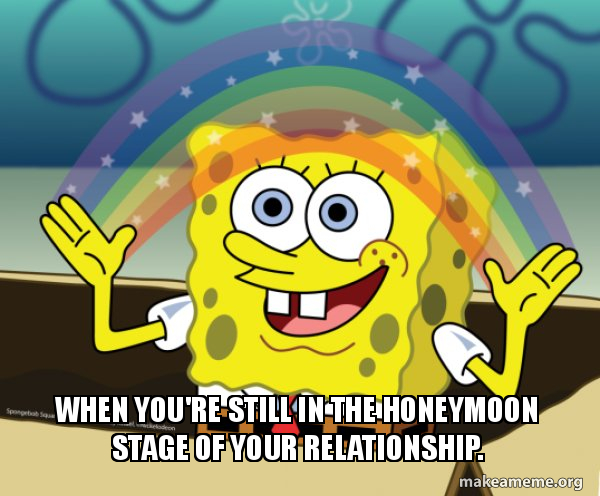

In [31]:
display.Image("https://media.makeameme.org/created/when-youre-still-5c534b.jpg")

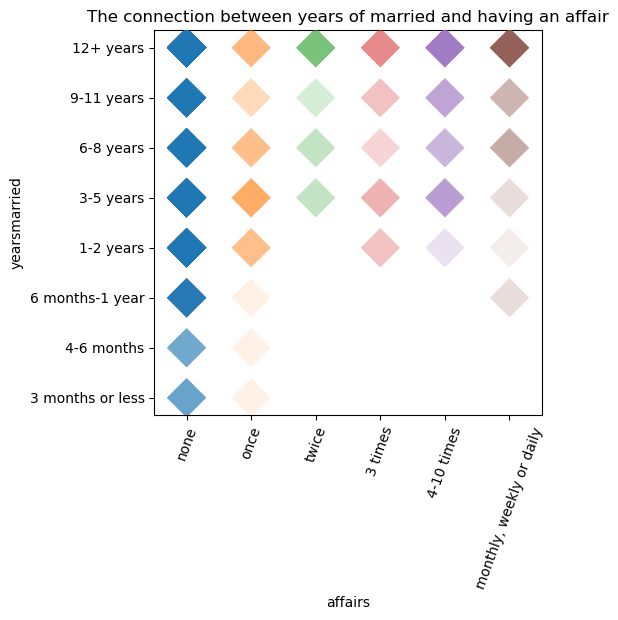

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plt.subplots_adjust(wspace=0.5)

x_order = ['none', 'once', 'twice', '3 times', '4-10 times', 'monthly, weekly or daily']
y_order = ['3 months or less', '4-6 months', '6 months-1 year', '1-2 years', '3-5 years', '6-8 years', '9-11 years', '12+ years']

new_affairs['yearsmarried'] = pd.Categorical(new_affairs['yearsmarried'], categories=y_order, ordered=True)

new_affairs_sorted = new_affairs.sort_values('yearsmarried')

sns.stripplot(data=new_affairs_sorted, x="affairs", y="yearsmarried", order=x_order, jitter=False, s=20, marker="D", linewidth=0, alpha=0.1)
plt.xticks(rotation=70)
plt.title("The connection between years of married and having an affair")
plt.show()

ראשית נסביר שבחרנו לעצב את הגרף בצורה כזו שלכל נקודה יש צבע מסויים (לא מאוד כהה), וככל שצבע הנקודה כהה יותר זה אומר שיש שם יותר ערכים. כלומר הם עולים אחד על השני ולכן הנקודה נהיית כהה יותר

עכשיו אפשר להבין מהגרף שמקבוצת האנשים שלא בגדו, יש את כל טווח שנות הנישואים.לעומתם, ניתן לראות שבטווח זמן הנישואין הראשוני - עד שנה, ממש כמעט ולא בוגדים. ואכן, ככל שנשואים יותר זמן אפשר לראות שיש יותר נקודות והן גם כהות יותר, כלומר אנשים בוגדים יותר, בכל סוגי הבגידות. עד שמגיעים ל 12+ שנות נישואים ורואים שכל הבגידות נעשו, ובצורה מרובה 

לכן, המסקנה העיקרית שלנו היא שבתקופת "ירח דבש" כמעט ולא בוגדים. וככל שנשואים יותר זמן, יש סבירות גבוהה יותר לבגוד

## "מסקנה 5- "דת

כעת, נרצה לדעת כיצד אמונה של אדם משפיעה על הסיכוי לנהל רומן ועל משך תדירותו.

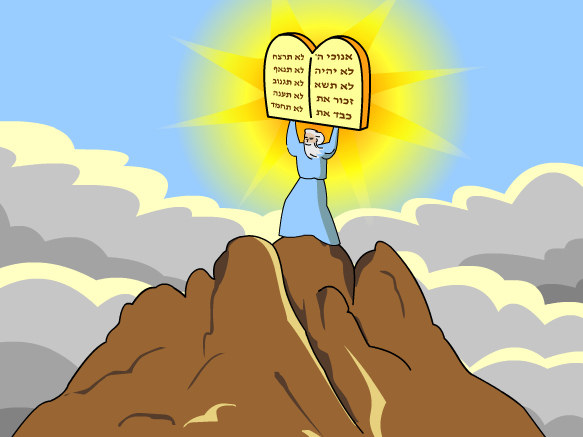

In [55]:
display.Image("https://cdn.brainpop.com/he/he/category_13/subcategory_814/subjects_2657/screenshot1.png")

In [34]:
religous_df=new_affairs.copy(deep=True)

In [35]:
religous_df['religiousness']=religous_df['religiousness'].replace({"anti":"no","not at all":"no","slightly":"yes","somewhat":"yes","very":"yes"})
religous_df['affairs']=religous_df['affairs'].replace({"none":"0","once":"1","twice":"1+","3 times":"1+","4-10 times":"1+","monthly, weekly or daily":"1+"})

In [36]:
no_relig=religous_df.loc[religous_df.religiousness=='no']
yes_relig=religous_df.loc[religous_df.religiousness!='no']


In [37]:
no_relig_affair_0=no_relig.loc[no_relig.affairs=='0']
no_relig_affair_1=no_relig.loc[no_relig.affairs=='1']
no_relig_affair_more1=no_relig.loc[no_relig.affairs=='1+']
only_relig_affair_0=yes_relig.loc[yes_relig.affairs=='0']
only_relig_affair_1=yes_relig.loc[yes_relig.affairs=='1']
only_relig_affair_more1=yes_relig.loc[yes_relig.affairs=='1+']


In [38]:
x=["0","1","1+"]
y=[len(no_relig_affair_0)/len(no_relig),len(no_relig_affair_1)/len(no_relig),len(no_relig_affair_more1)/len(no_relig)]
y2=[len(only_relig_affair_0)/len(yes_relig),len(only_relig_affair_1)/len(yes_relig),len(only_relig_affair_more1)/len(yes_relig)]
line_colors=["red","blue"]
line_labels=["Not religious","Religious"]

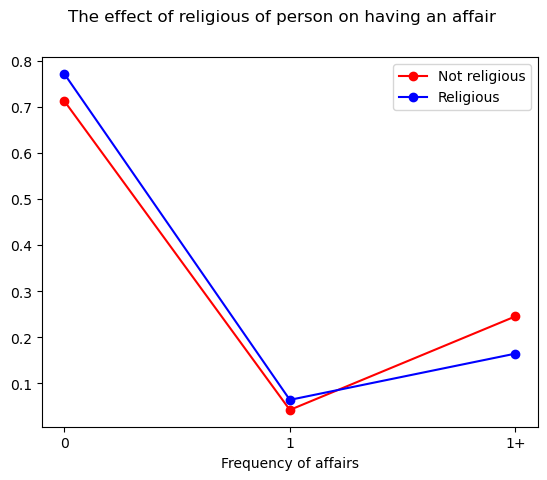

In [39]:
plt.plot(x,y,'-o',color=line_colors[0],label=line_labels[0])
plt.plot(x,y2,'-o',color=line_colors[1],label=line_labels[1])
#plt.yticks(y)
plt.legend()
plt.suptitle("The effect of religious of person on having an affair")
plt.xlabel('Frequency of affairs')


plt.show()

גילינו כי בקבוצת האנשים שלא ניהלו רומן וכן בין האנשים שניהלו רומן אחד, ניתן לראות כי קבוצת האנשים המאמינים עלתה על קבוצת הלא מאמינים. כלומר, בשני סוגים אלו של ניהול רומן- הרוב הינם המאמינים.

לעומת זאת, אם מסתכלים על קבוצת האנשים שמנהלים רומן ממושך, ניתן לראות בבירור כי מי שנמצא במעלה הגרף הם קבוצת האנשים הלא מאמינים.

כלומר- אנו לומדות כי יש יותר אנשים מאמינים שמנהלים 0 רומנים ורומן אחד, ומנגד אנשים לא מאמינים מבצעים יותר רומנים מתמשכים

## הצגת מודל חיזוי, דיוקו וסדר חשיבות הפיצ'רים   

לאחר שחקרנו חמישה פרמטרים ובדקנו את הקשר שלהם ביחס לניהול רומן, נבצע מודל חיזוי המסתמך עליהם. 

In [40]:
features2 = ['gender','children', 'rating','yearsmarried','religiousness']
X2 = yes_no_affairs[features2]
y2 = yes_no_affairs['affairs']
X2_train, X2_test, y2_train, y2_test = sk.model_selection.train_test_split(X2, y2, test_size=0.3, random_state=1) 

In [41]:
my_model2 =sk.tree.DecisionTreeClassifier(criterion="gini")
my_model2.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [42]:
feature_importances2 = pd.DataFrame(my_model2.feature_importances_,
                                   index = X2.columns[:10],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False,)
feature_importances2.head()

,importance
yearsmarried,0.326921
religiousness,0.239473
rating,0.203617
gender,0.158273
children,0.071716


In [43]:
pred2 = my_model2.predict(X2_test)
acc2 = sk.metrics.accuracy_score(pred2, y2_test)
print("The accuracy is:",acc2)

The accuracy is: 0.6961325966850829


קיבלנו שהדיוק על חמשת הפרמטרים הינו 0.696. עתה נבצע חיזוי עבור 3 התכונות שנמצאות בראש הרשימה ונראה אם יחול שינוי בדיוק

נשים לב כי שלושת הפרמטרים שנמצאים בראש הרשימה הם גם אלו שמצאנו שבאמת משפיעים על ניהול הרומן. לעומת השניים האחרים שהצלחנו להסיק עליהם מהגרפים שאין להם הרבה השפעה על ניהול הרומן, דבר הבא לידי ביטוי במודל החיזוי.

In [44]:
features = [ 'rating','yearsmarried','religiousness']
X = yes_no_affairs[features]
y = yes_no_affairs['affairs']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=1) 

In [45]:
my_model =sk.tree.DecisionTreeClassifier(criterion="gini")
my_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
feature_importances = pd.DataFrame(my_model.feature_importances_,
                                   index = X.columns[:3],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False,)
feature_importances.head()

,importance
yearsmarried,0.404517
rating,0.310887
religiousness,0.284596


In [47]:
pred = my_model.predict(X_test)
acc = sk.metrics.accuracy_score(pred, y_test)
print("The accuracy is:",acc)

The accuracy is: 0.7734806629834254


אנו רואים שאכן חל שינוי בדיוק והוא גדל ל 0.773

![Alt Text](https://media0.giphy.com/media/lQ0zDXnZJwfcQLtNUP/giphy.gif)

תודה על ההקשבה!